In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def read_fasta_to_dataframe(file_path):
    sequences = []

    with open(file_path, 'r') as file:
        for i, line in enumerate(file):
            if i % 2 == 1:  # Every second line contains the sequence
                sequences.append(line.strip())

    # Create a DataFrame from the list of sequences
    df = pd.DataFrame(sequences, columns=['Sequence'])

    return df

In [3]:
variants = ["Ref", "Sup", "Pel"]

In [4]:
#Create an empty dictionary
df_raw = {}

#Store each dataframe generated by read_fasta_to_dataframe in df_raw under its variants name
for variant in variants:
    file_path = f"../len_fil/{variant}_fil_1.fasta"
    df_raw[variant] = read_fasta_to_dataframe(file_path)

In [5]:
def calculate_nucleotide_content(df):
    # Get the maximum sequence length
    max_length = df['Sequence'].str.len().max()

    # Initialize a dictionary to store nucleotide counts for each position
    position_counts = {nucleotide: [0] * max_length for nucleotide in 'AGCT'}

    # Count the nucleotides at each position
    for sequence in df['Sequence']:
        for position, nucleotide in enumerate(sequence):
            if nucleotide in position_counts:
                position_counts[nucleotide][position] += 1

    # Convert counts to percentages
    position_percentages = {nucleotide: [] for nucleotide in 'AGCT'}
    for position in range(max_length):
        total_count = sum(position_counts[nuc][position] for nuc in 'AGCT')
        if total_count > 0:
            for nucleotide in 'AGCT':
                position_percentages[nucleotide].append((position_counts[nucleotide][position] / total_count) * 100)
        else:
            for nucleotide in 'AGCT':
                position_percentages[nucleotide].append(0)

    # Create a DataFrame from the position percentages
    percentage_df = pd.DataFrame(position_percentages)

    return percentage_df

In [6]:
#Create an empty dictionary
df_perc = {}

#Store each dataframe generated by calculate_nucleotide_content in df_perc under its variants name
for variant in variants:
    df_perc[variant] = calculate_nucleotide_content(df_raw[variant])

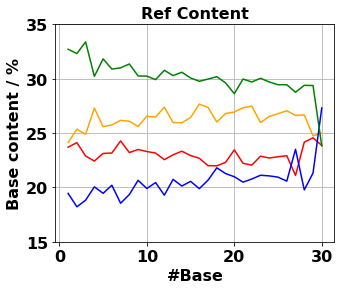

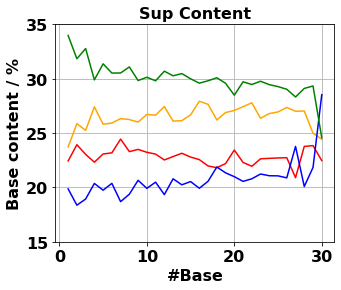

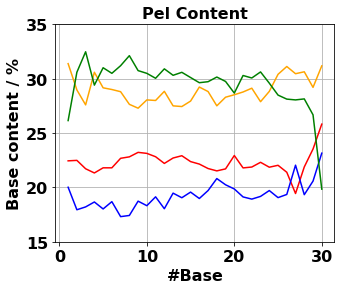

In [7]:
#Some generic settings to match the asthetics of this paper
#plt.rcParams['font.family'] = 'Arial'
plt.rcParams['font.size'] = 16
plt.rcParams['font.weight'] = 'bold'

for variant, perc in df_perc.items():
    #Plots the lines for G, A, C and T
    plt.figure(figsize=(5, 4))
    plt.plot(perc.index + 1, perc["G"], label="G", color="orange")
    plt.plot(perc.index + 1, perc["A"], label="A", color="red")
    plt.plot(perc.index + 1, perc["C"], label="C", color="blue")
    plt.plot(perc.index + 1, perc["T"], label="T", color="green")

    #Labels and design
    plt.grid()
    plt.title(f"{variant} Content", weight="bold", fontsize=16)
    plt.xlabel("#Base", weight="bold", fontsize=16)
    plt.ylabel("Base content / %", weight="bold", fontsize=16)
    plt.yticks(np.arange(15, 40, 5), fontsize=16, weight='bold')

    #Save each figure individually
    plt.savefig(f"{variant}_content.pdf", bbox_inches="tight", pad_inches=0.1)
    plt.show()

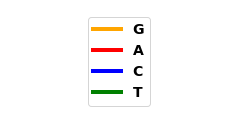

In [8]:
#Creating the legend as a seperate file
plt.figure(figsize=(4, 2))
handles = [
   plt.Line2D([0], [0], color='orange', lw=4),
   plt.Line2D([0], [0], color='red', lw=4),
   plt.Line2D([0], [0], color='blue', lw=4),
   plt.Line2D([0], [0], color='green', lw=4),
]
labels = ['G', 'A', 'C', 'T']
plt.legend(handles, labels, loc='center', fontsize=14)

# Turn off axes and save legend figure
plt.axis('off')
plt.savefig("legend_content.pdf", bbox_inches="tight")

In [9]:
#Creating an empty dictionary
df_diff = {}

#Subtracting the Reference from each sample
for variant in variants:
    df_diff[variant] = df_perc[variant] - df_perc["Ref"]

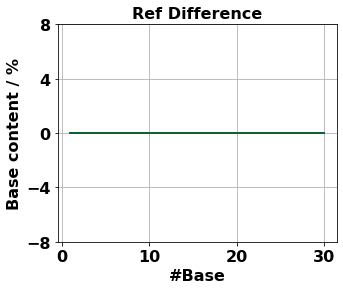

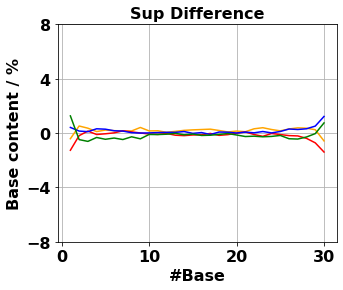

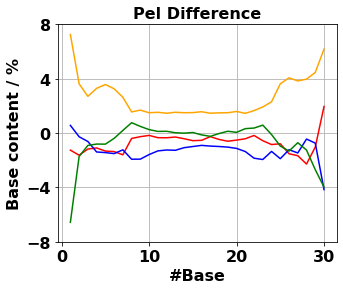

In [10]:
#Plotting the df_diff for each sample.
for variant, diff in df_diff.items():
    plt.figure(figsize=(5, 4))
    plt.plot(diff.index + 1, diff["G"], label="G", color="orange")
    plt.plot(diff.index + 1, diff["A"], label="A", color="red")
    plt.plot(diff.index + 1, diff["C"], label="C", color="blue")
    plt.plot(diff.index + 1, diff["T"], label="T", color="green")
    
    plt.grid()
    plt.title(f"{variant} Difference", weight="bold", fontsize=16)
    plt.xlabel("#Base", weight="bold", fontsize=16)
    plt.ylabel("Base content / %", weight="bold", fontsize=16)
    
    plt.yticks(np.arange(-8, 9, 4), fontsize=16, weight='bold')
    
    plt.savefig(f"{variant}_difference.pdf", bbox_inches="tight", pad_inches=0.1)